In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import seaborn as sns
import matplotlib.pyplot as plt
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
train_df = pd.read_csv("train.csv")
train_df

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


# Basic Data cleaning

In [16]:
train_df["date"] = pd.to_datetime(train_df["date"])

In [17]:
train_df

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [19]:
train_df["date"].describe()

count                 230130
mean     2013-07-02 00:00:00
min      2010-01-01 00:00:00
25%      2011-10-02 00:00:00
50%      2013-07-02 00:00:00
75%      2015-04-02 00:00:00
max      2016-12-31 00:00:00
Name: date, dtype: object

In [20]:
train_df.dtypes

id                   int64
date        datetime64[ns]
country             object
store               object
product             object
num_sold           float64
dtype: object

In [21]:
train_df["num_sold"] = train_df["num_sold"].fillna(0)

In [22]:
train_df.dtypes

id                   int64
date        datetime64[ns]
country             object
store               object
product             object
num_sold           float64
dtype: object

# EDA and Visualization

In [23]:
train_df

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,0.0
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [28]:
train_df["country"].unique()

array(['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore'],
      dtype=object)

In [29]:
train_df["store"].unique()

array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
      dtype=object)

In [30]:
train_df["product"].unique()

array(['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler',
       'Kerneler Dark Mode'], dtype=object)

In [34]:
train_df.pivot_table(index = "date", columns = "country", values = "num_sold", aggfunc = "sum")

country,Canada,Finland,Italy,Kenya,Norway,Singapore
date,,,,,,
2010-01-01,15099.0,15360.0,11645.0,293.0,27923.0,15246.0
2010-01-02,14841.0,14352.0,10888.0,286.0,27178.0,15003.0
2010-01-03,15614.0,15527.0,12015.0,303.0,29053.0,15816.0
2010-01-04,11823.0,11935.0,9145.0,232.0,22766.0,12174.0
2010-01-05,11505.0,11734.0,9170.0,226.0,21481.0,11597.0
...,...,...,...,...,...,...
2016-12-27,11002.0,11940.0,7939.0,359.0,18346.0,14957.0
2016-12-28,12173.0,13368.0,8842.0,412.0,20340.0,16002.0
2016-12-29,13166.0,14509.0,9674.0,417.0,21729.0,17910.0


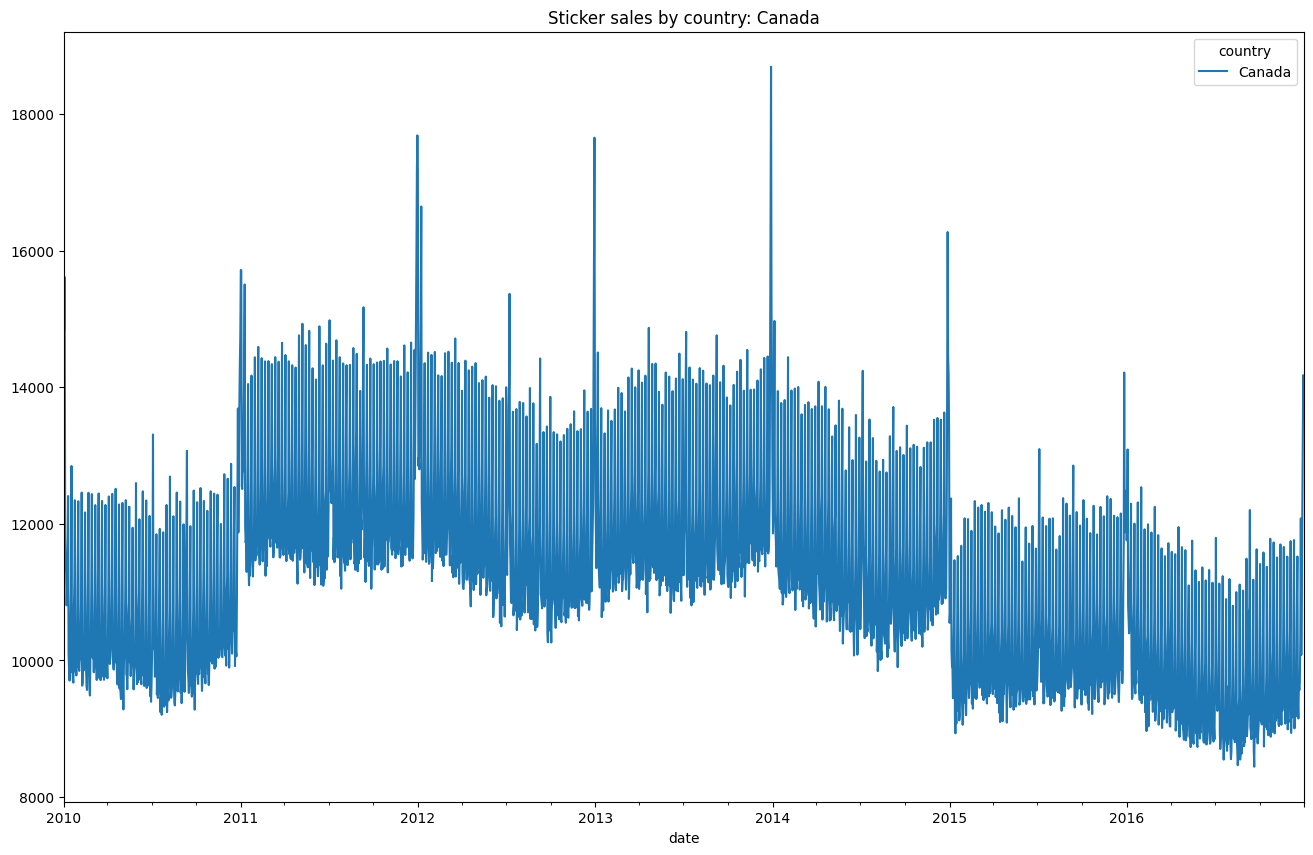

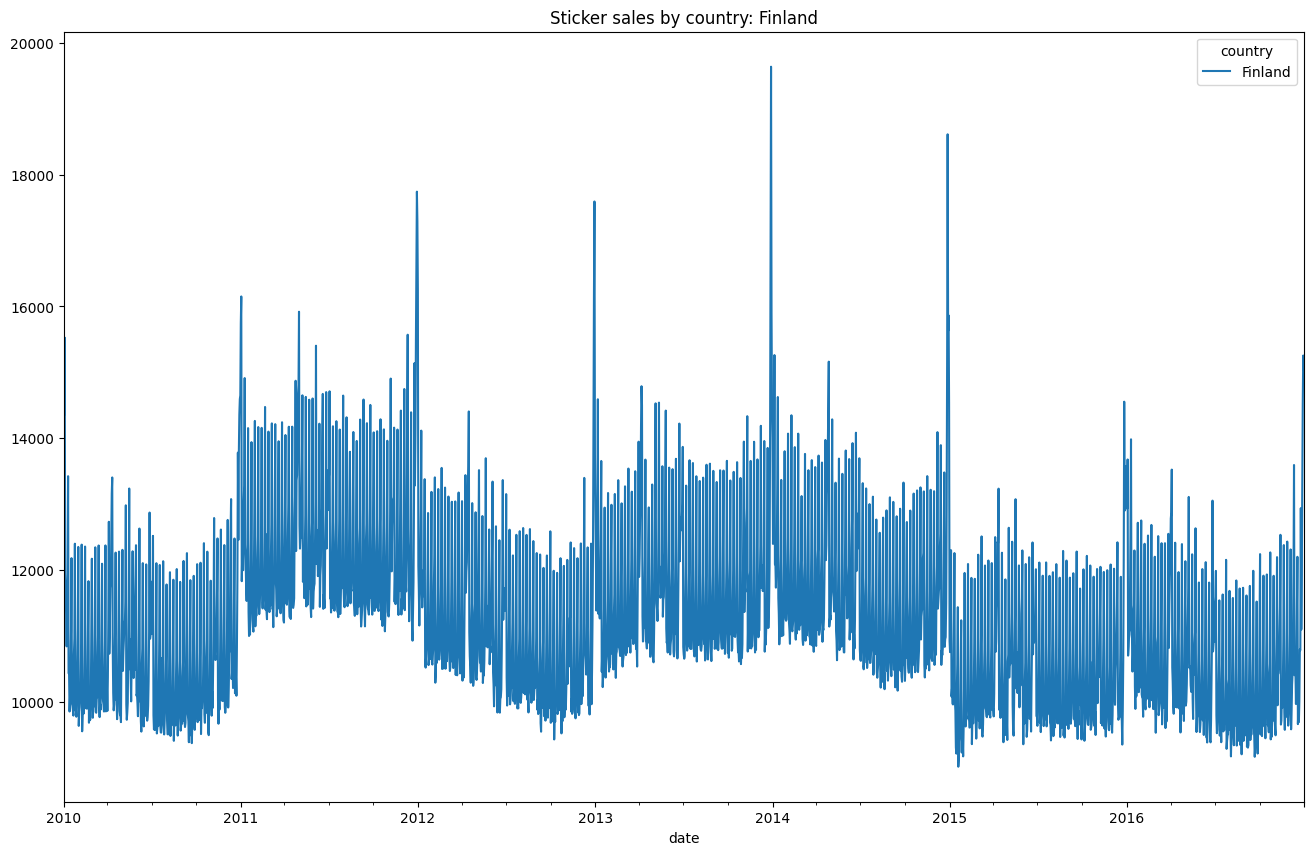

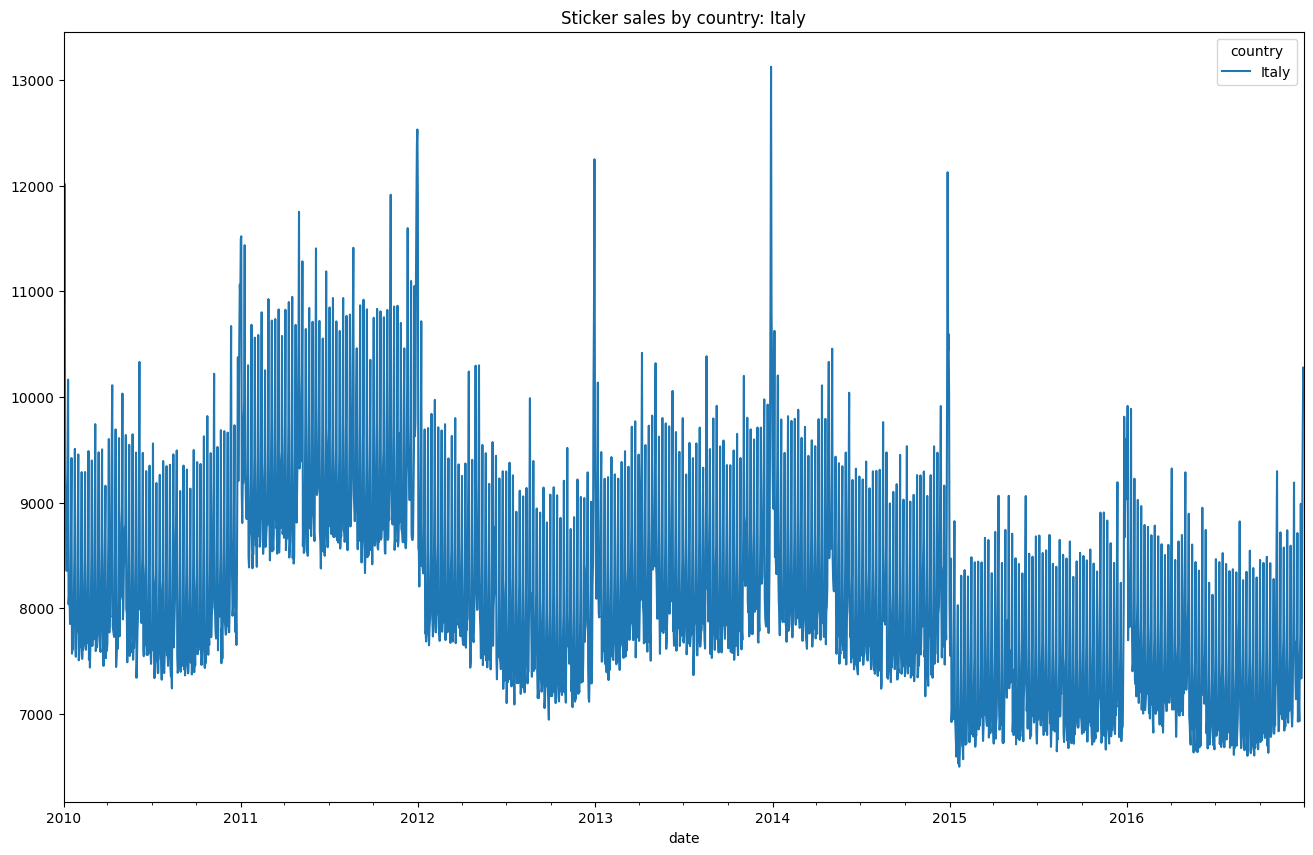

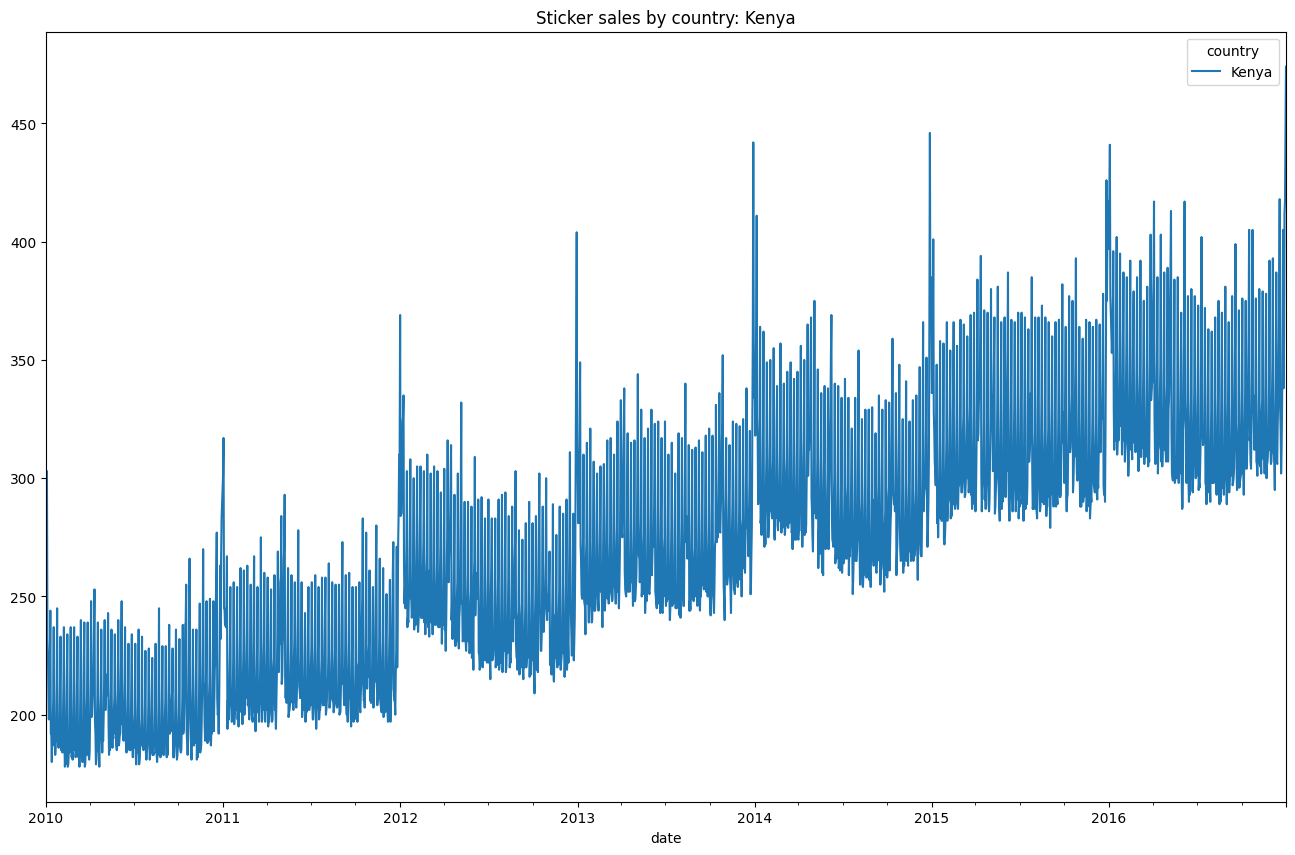

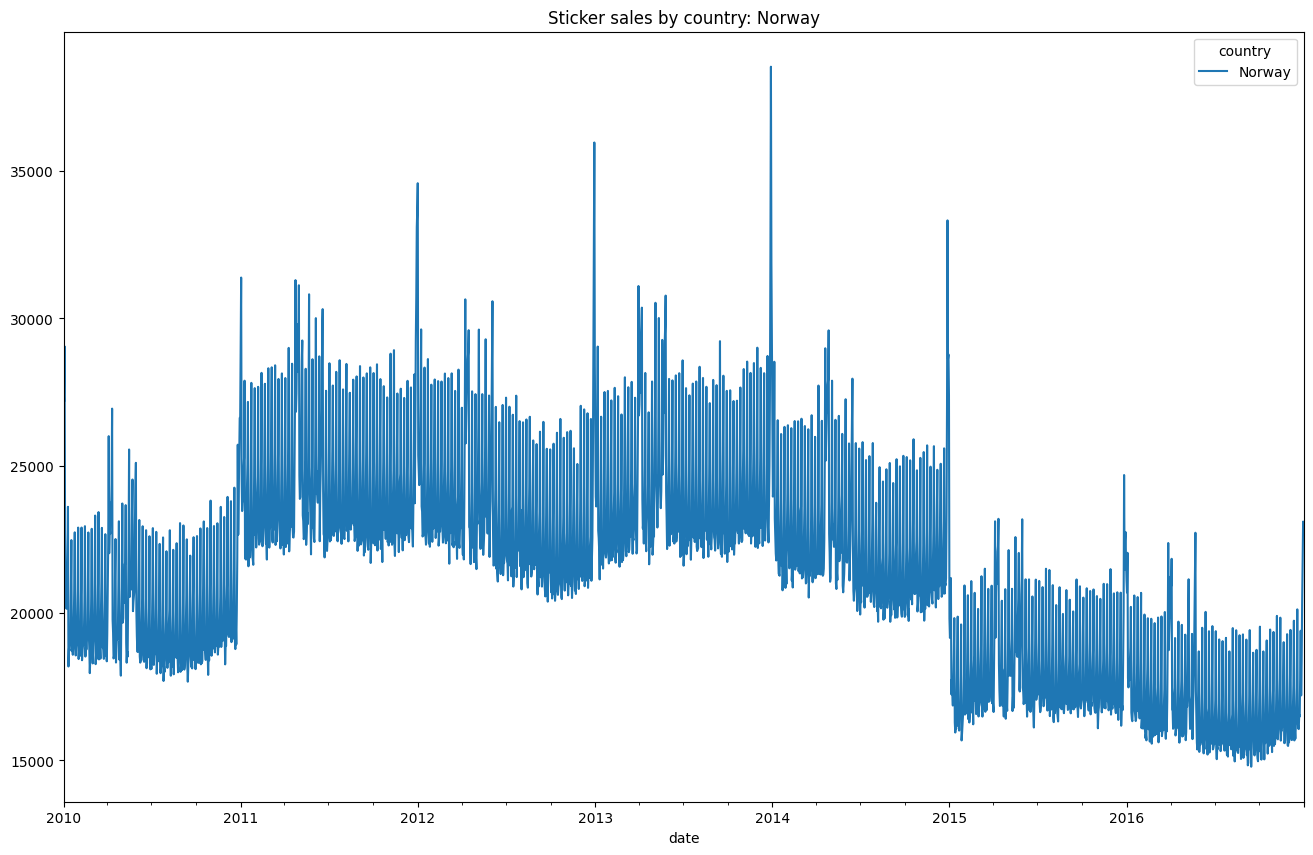

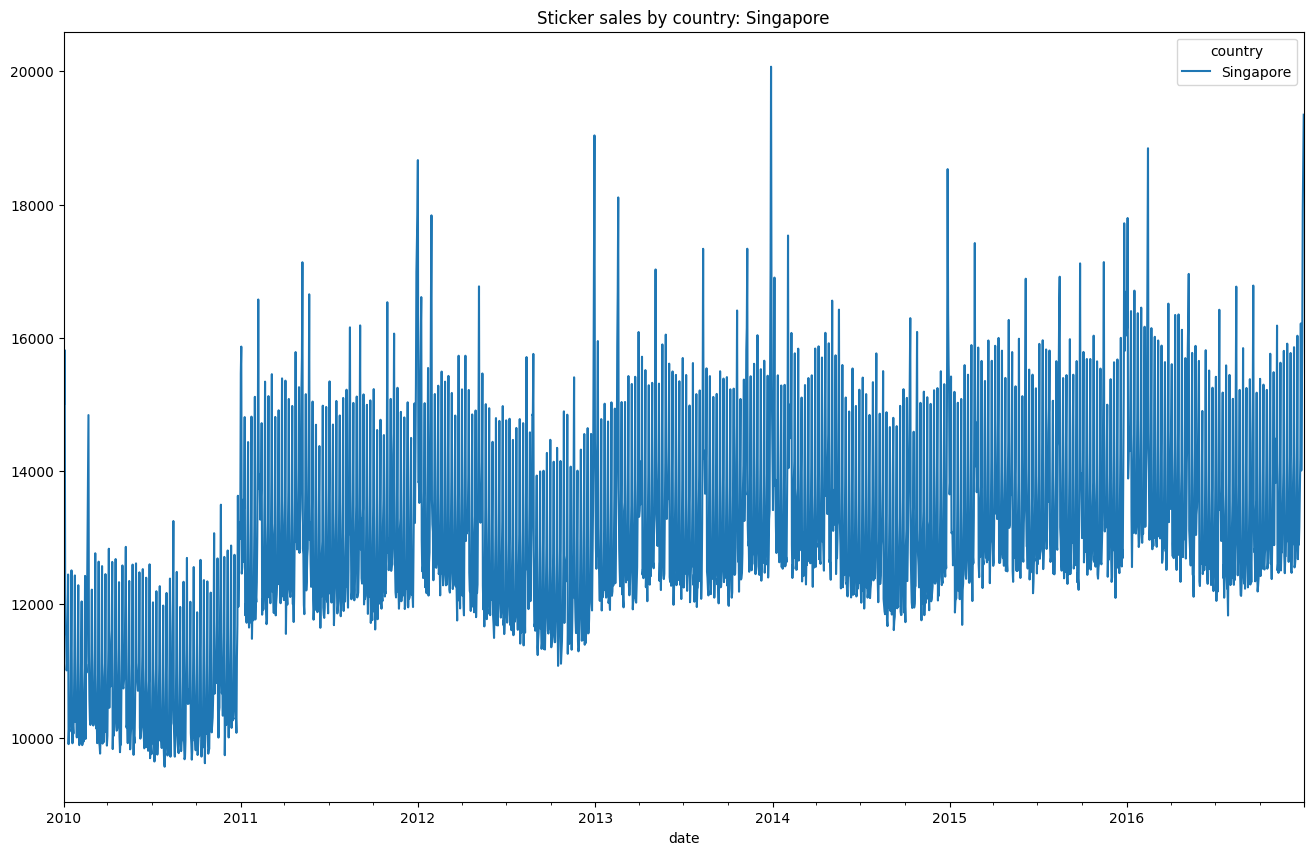

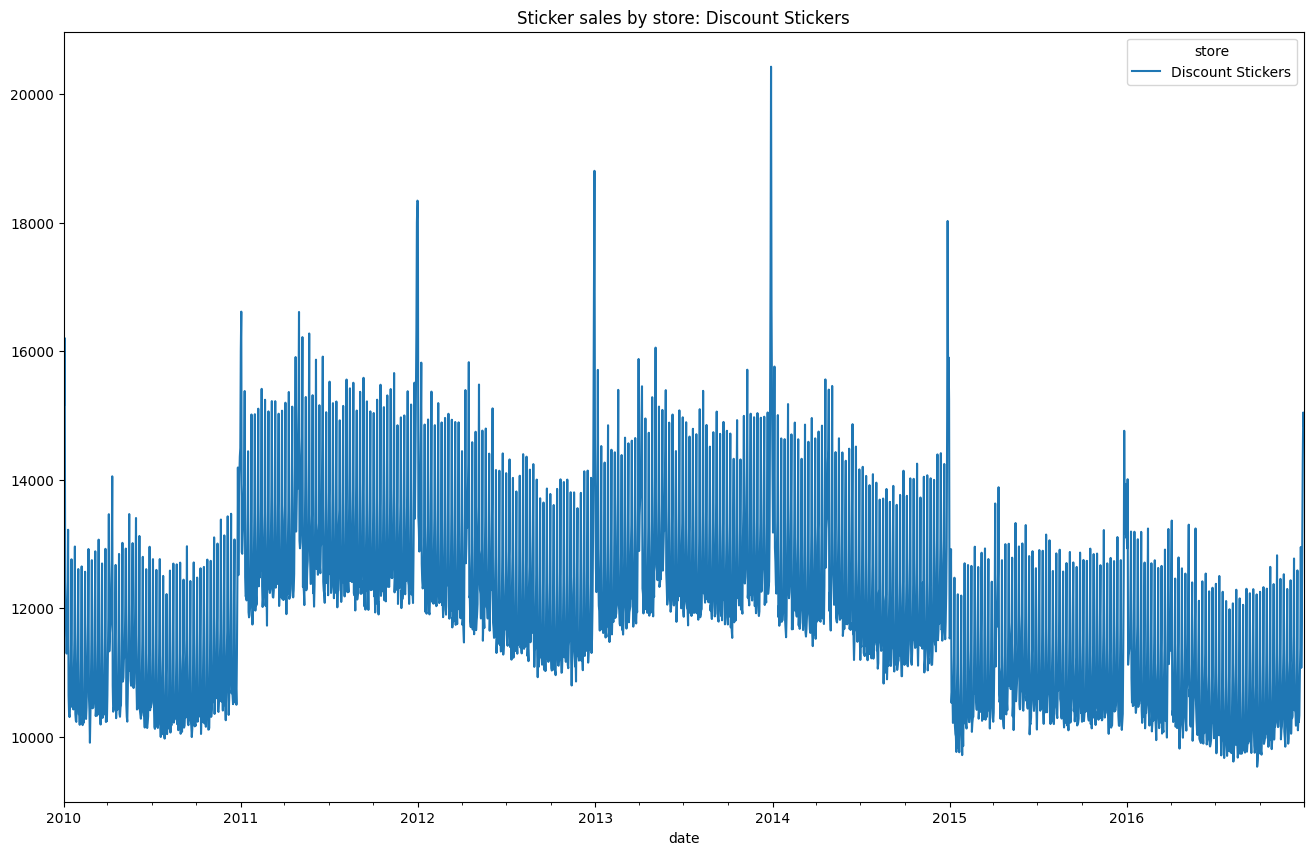

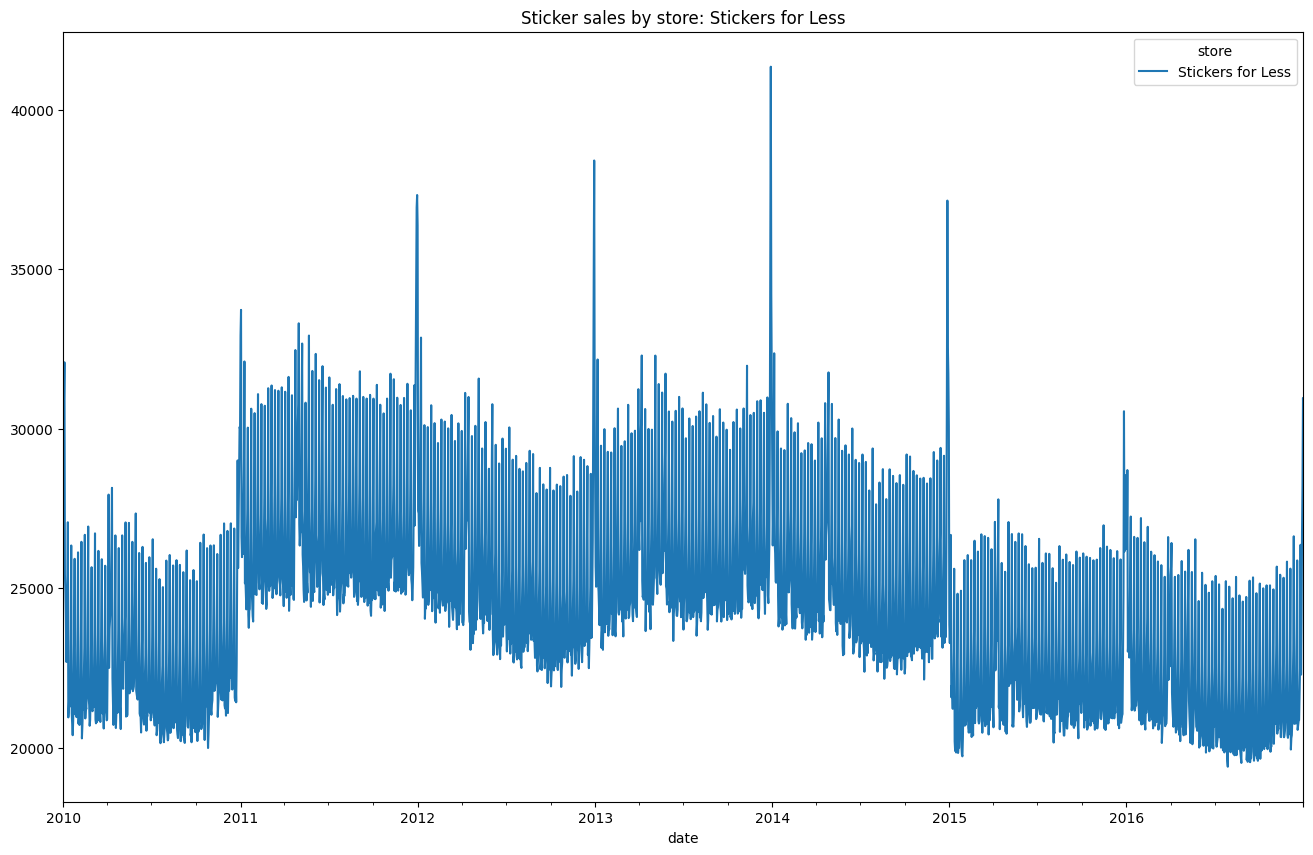

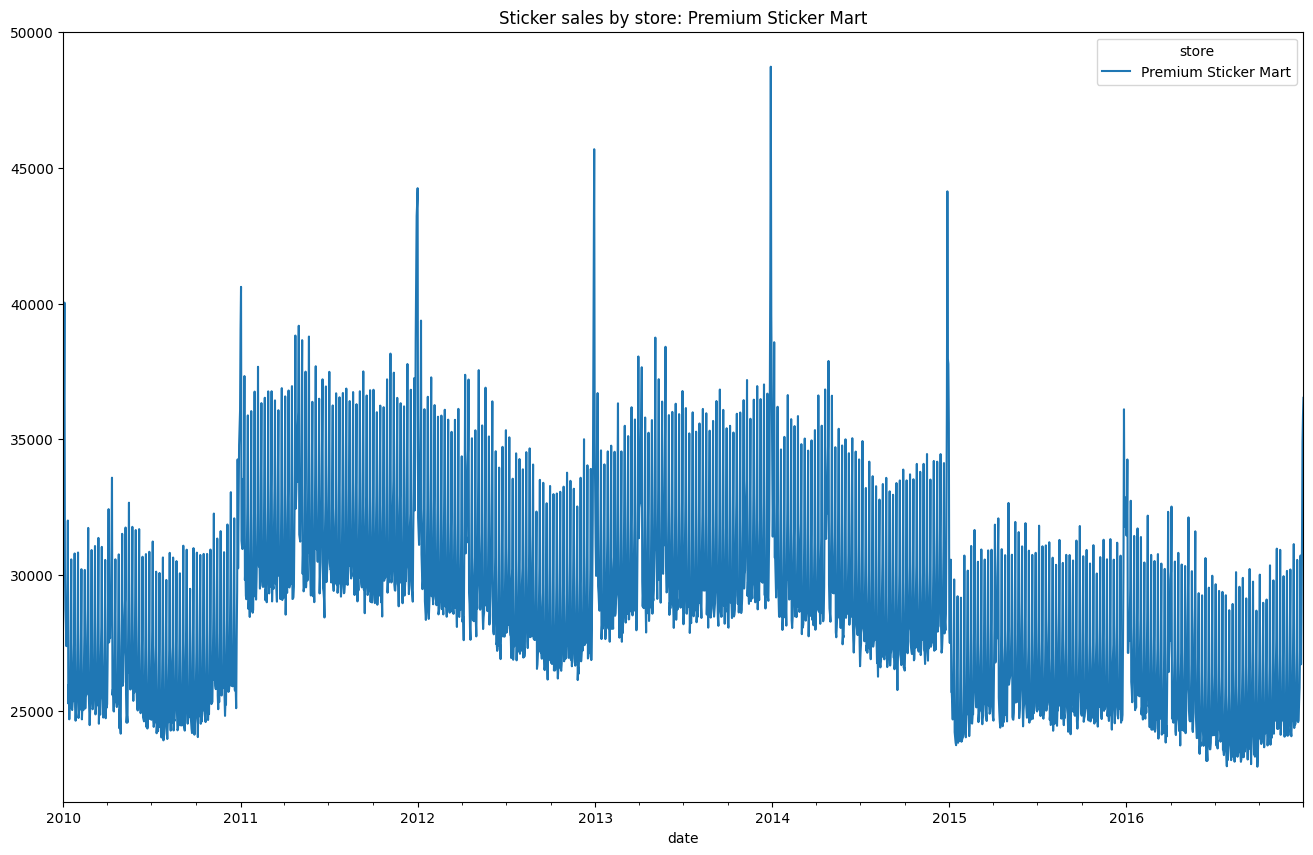

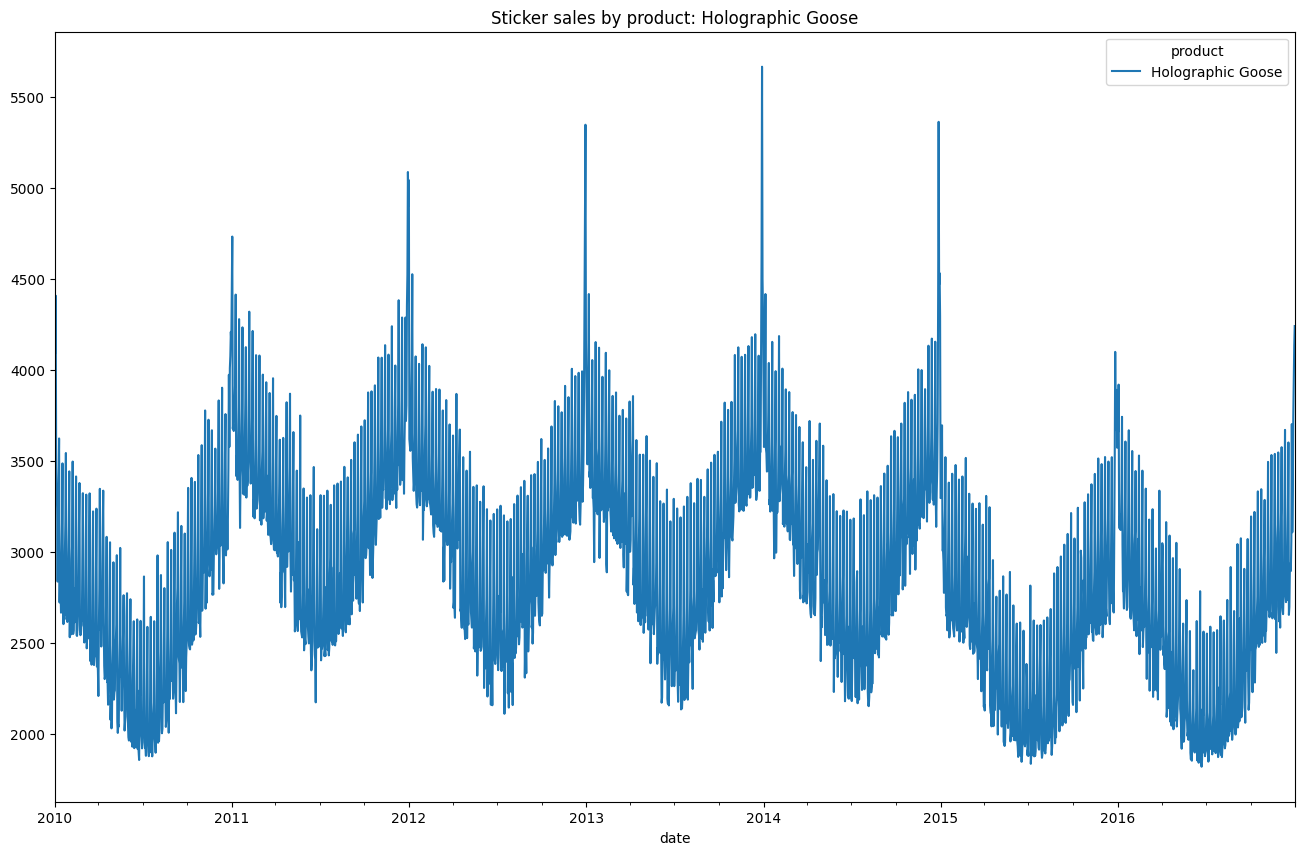

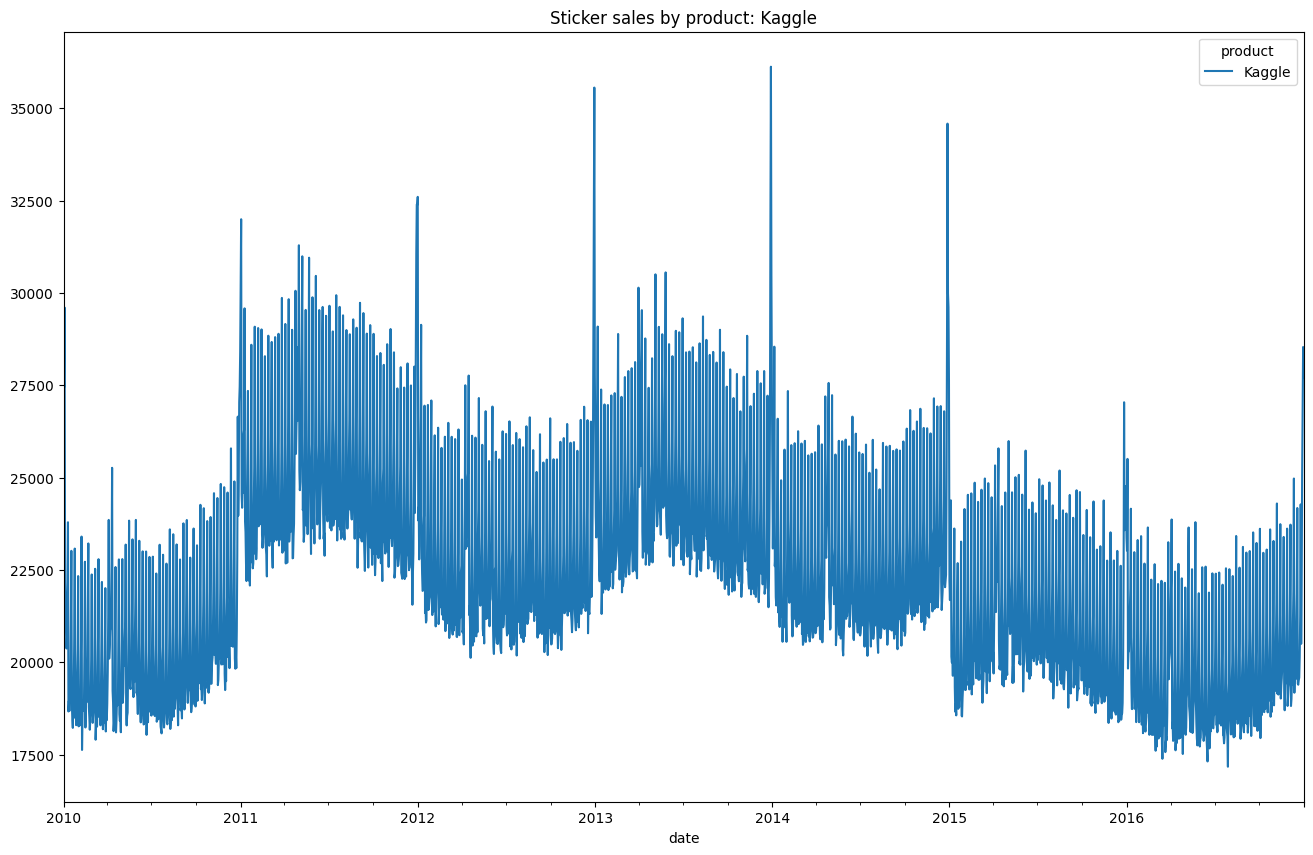

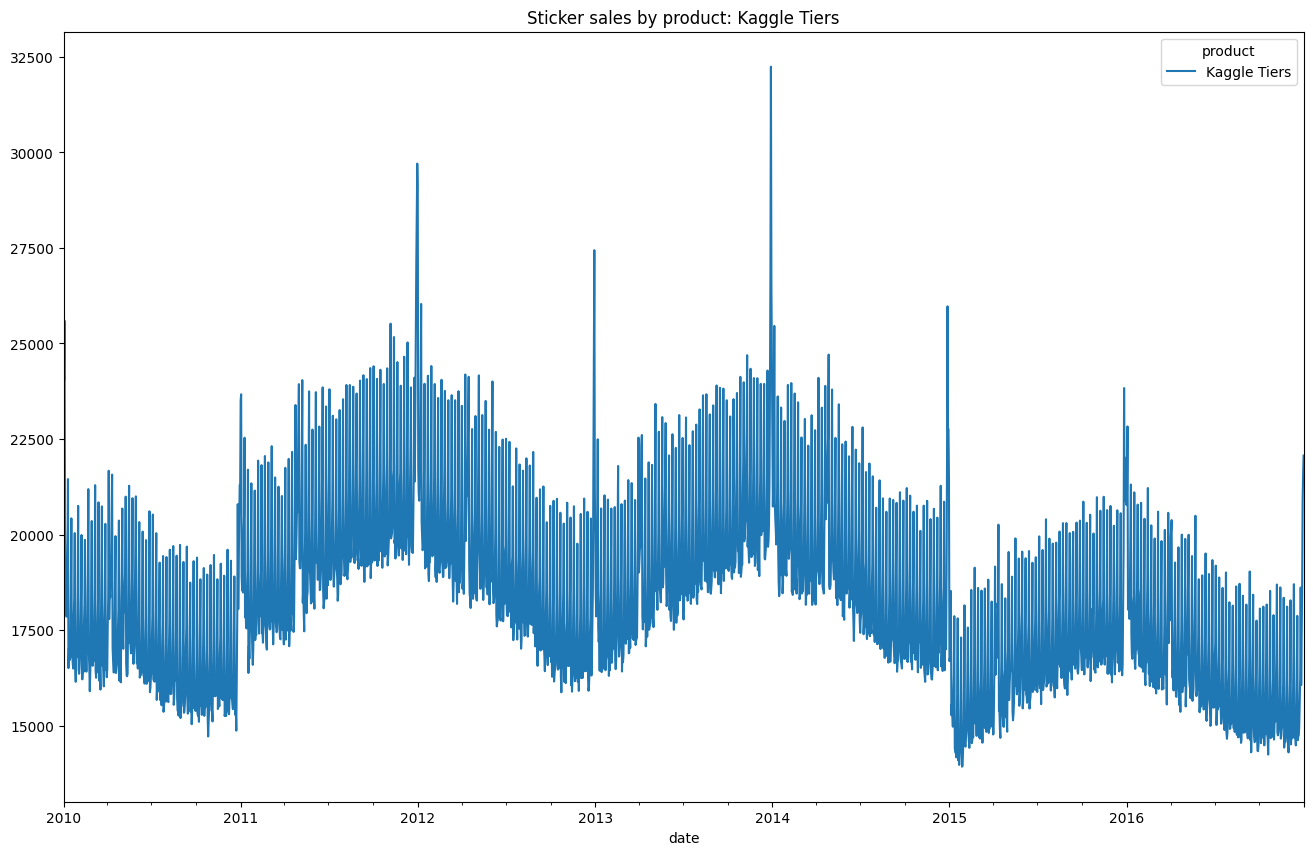

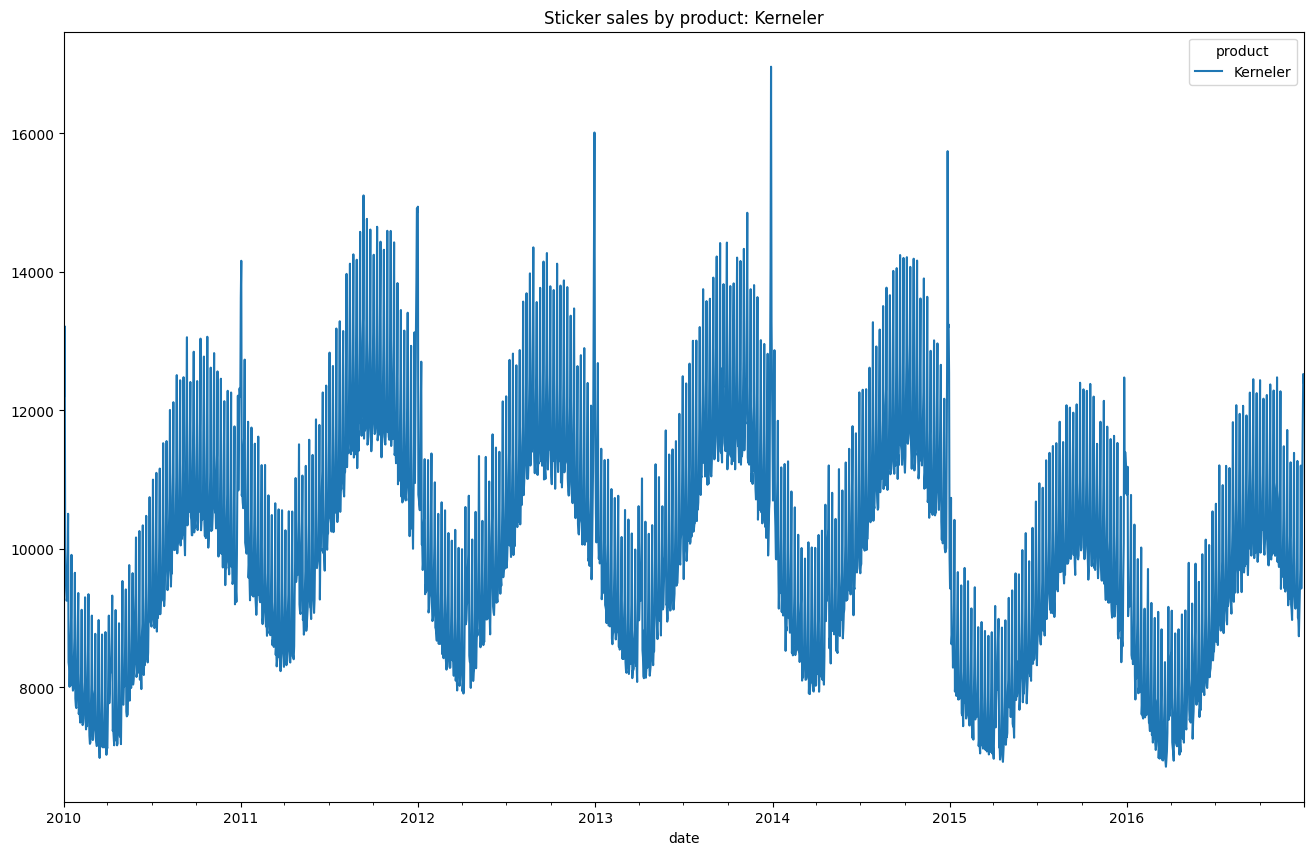

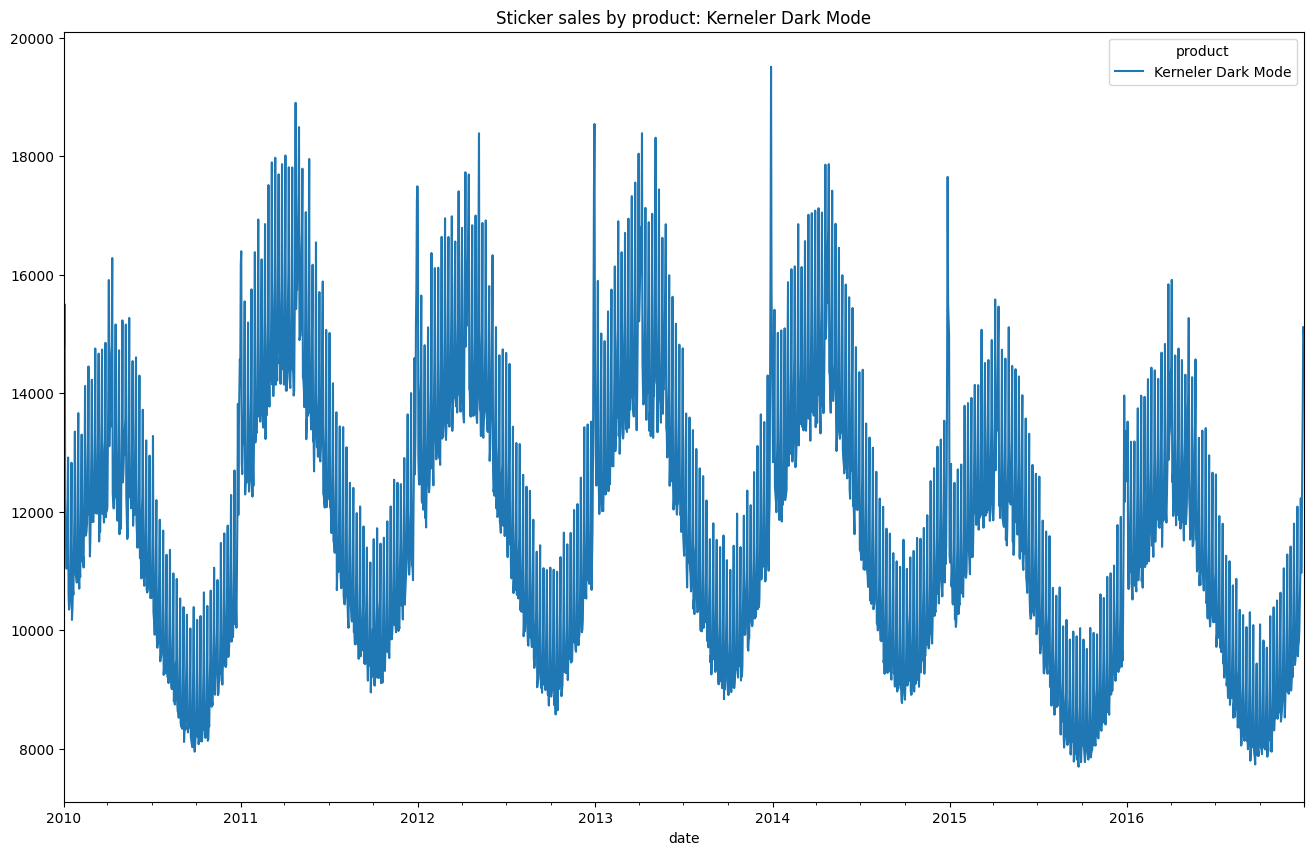

In [37]:
for c in ["country", "store", "product"]:
    for c2 in train_df[c].unique():
        train_df[train_df[c] == c2].pivot_table(index = "date", columns = c, values = "num_sold", aggfunc = "sum").plot(title = f"Sticker sales by {c}: {c2}", kind = "line", figsize = (16,10))
        plt.show()

In [27]:
train_df.pivot(index = "date", columns = ["country", "store", "product"], values = "num_sold")

country               Canada                                                   \
store      Discount Stickers                                                    
product    Holographic Goose  Kaggle Kaggle Tiers Kerneler Kerneler Dark Mode   
date                                                                            
2010-01-01               0.0   973.0        906.0    423.0              491.0   
2010-01-02               0.0   881.0        854.0    440.0              437.0   
2010-01-03               0.0  1003.0        839.0    417.0              495.0   
2010-01-04               0.0   744.0        609.0    339.0              441.0   
2010-01-05               0.0   707.0        640.0    290.0              372.0   
...                      ...     ...          ...      ...                ...   
2016-12-27               0.0   694.0        577.0    298.0              372.0   
2016-12-28               0.0   810.0        601.0    355.0              424.0   
2016-12-29               0.0   856.0        687.0    404.0              442.0   
2016-12-30               0.0   939.0        704.0    400.0              498.0   
2016-12-31               0.0   874.0        622.0    401.0              471.0   

country                                                                        \
store      Stickers for Less                                                    
product    Holographic Goose  Kaggle Kaggle Tiers Kerneler Kerneler Dark Mode   
date                                                                            
2010-01-01             300.0  1837.0       1659.0    807.0              940.0   
2010-01-02             281.0  1972.0       1541.0    783.0             1068.0   
2010-01-03             297.0  1936.0       1770.0    832.0             1087.0   
2010-01-04             235.0  1382.0       1243.0    646.0              778.0   
2010-01-05             240.0  1416.0       1319.0    612.0              772.0   
...                      ...     ...          ...      ...                ...   
2016-12-27             233.0  1518.0       1104.0    612.0              708.0   
2016-12-28             261.0  1702.0       1249.0    733.0              815.0   
2016-12-29             266.0  1607.0       1137.0    746.0              898.0   
2016-12-30             303.0  1851.0       1465.0    836.0              924.0   
2016-12-31             284.0  1703.0       1433.0    749.0              951.0   

country     ...         Singapore                                \
store       ... Stickers for Less                                 
product     ... Holographic Goose  Kaggle Kaggle Tiers Kerneler   
date        ...                                                   
2010-01-01  ...             301.0  1981.0       1565.0    841.0   
2010-01-02  ...             268.0  1763.0       1689.0    781.0   
2010-01-03  ...             289.0  1801.0       1690.0    813.0   
2010-01-04  ...             256.0  1543.0       1205.0    602.0   
2010-01-05  ...             226.0  1364.0       1352.0    629.0   
...         ...               ...     ...          ...      ...   
2016-12-27  ...             267.0  1948.0       1483.0    853.0   
2016-12-28  ...             316.0  2127.0       1580.0    962.0   
2016-12-29  ...             357.0  2269.0       1788.0    980.0   
2016-12-30  ...             359.0  2357.0       1872.0   1094.0   
2016-12-31  ...             384.0  2380.0       2103.0   1052.0   

country                                                                  \
store                         Premium Sticker Mart                        
product    Kerneler Dark Mode    Holographic Goose  Kaggle Kaggle Tiers   
date                                                                      
2010-01-01             1080.0                317.0  2112.0       1992.0   
2010-01-02              971.0                364.0  2322.0       1938.0   
2010-01-03              987.0                388.0  2253.0       2315.0   
2010-01-04              839.0        

# Feature Eng

# Model Testing: 

## Bayesian/Probabilistic